<a href="https://colab.research.google.com/github/SamuelBFG/DL-studies/blob/master/1-predict_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Category of an Image**

First you'll need to install some libraries. Run the following commands.

In [ ]:
# If you are running on Jupyter Notebook enviroment you'll first need to install pip package, the command:
# !conda install --yes -c anaconda pip

!pip install tensorflow==2.0.0
!pip install keras -U
!pip install numpy -U
!pip install matplotlib -U
!pip install pillow -U 


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Once we have imported our libraries, we will load and display our test image in a 224x224 resolution.

In [2]:
from google.colab import files
files.upload()

Saving cat.jpg to cat.jpg


{'cat.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00H\x00H\x00\x00\xff\xe1\x07hExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\t\x01\x0f\x00\x02\x00\x00\x00\x06\x00\x00\x00z\x01\x10\x00\x02\x00\x00\x00\t\x00\x00\x00\x80\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00\x8a\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00\x92\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x07\x00\x00\x00\x9a\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\xa2\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\xb6\x88%\x00\x04\x00\x00\x00\x01\x00\x00\x06f\x00\x00\x00\x00Apple\x00iPhone 7\x00\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x0110.3.3\x00\x002017:08:17 18:09:36\x00\x00 \x82\x9a\x00\x05\x00\x00\x00\x01\x00\x00\x02<\x82\x9d\x00\x05\x00\x00\x00\x01\x00\x00\x02D\x88"\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x88\'\x00\x03\x00\x00\x00\x01\x00@\x00\x00\x90\x00\x00\x07\x00\x00\x00\x040221\x90\x03\x00\x02\x00\x00\x00\x14\x00\x00\x02L\x90\x04\x00\x02\x00\x00\x00\x14\x00\x00\x02`\x91\x01\x00\x07

In [3]:
IMG_PATH = "/content/cat.jpg"

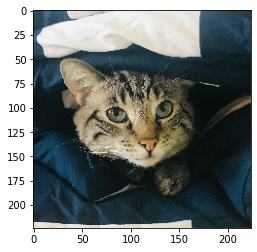

In [4]:
img = image.load_img(IMG_PATH, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [5]:
model = tf.keras.applications.resnet50.ResNet50()

102973440/102967424 [==============================] - 1s 0us/step


Our model has previously been trained only to accept a batch of images. expand_dims adds an extra dimension to the array, thereby creating an array of arrays (or a batch of one image).

In [6]:
def predict(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    model = tf.keras.applications.resnet50.ResNet50()
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = model.predict(img_preprocessed)
    print(decode_predictions(prediction, top=3)[0])

In [7]:
predict(IMG_PATH)

40960/35363 [==================================] - 0s 0us/step
[('n02123045', 'tabby', 0.5681725), ('n02124075', 'Egyptian_cat', 0.22223192), ('n02123159', 'tiger_cat', 0.061033927)]
